In [1]:
import pandas as pd
import plotly.express as px

import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristofszucs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kristofszucs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('/Users/kristofszucs/Documents/jupyter_notebooks/projet_supply_chain_datascientest/asurion_complete.csv')

In [3]:
df

,titre,nom,stars,localisation,nb_reviews,date_review,date_experience,comment
0,Fast efficient and simple process for repair,Debbie Denmark,Rated 5 out of 5 stars,US,1 review,2023-05-24T19:47:54.000Z,"Date of experience: May 20, 2023",My husband cracked his iPhone screen on a Satu...
1,A+ service,Brandon,Rated 5 out of 5 stars,US,1 review,2023-05-24T21:56:18.000Z,"Date of experience: May 24, 2023",I was having difficulty with a tablet being se...
2,Excellent service,Kevin P.,Rated 5 out of 5 stars,US,1 review,2023-05-24T20:18:21.000Z,"Date of experience: May 18, 2023",With any insurance claim you obviously have to...
3,I was out fishing on the lake another…,John Frazzini,Rated 5 out of 5 stars,US,3 reviews,2023-05-24T18:38:46.000Z,"Date of experience: May 19, 2023",I was out fishing on the lake another boat sid...
4,Everything went very well,JOSEPHINE,Rated 5 out of 5 stars,US,1 review,2023-05-24T17:02:02.000Z,"Date of experience: May 20, 2023",Everything went very well except I was confuse...
...,...,...,...,...,...,...,...,...
91768,Verizon replacement,RUTH P,Rated 3 out of 5 stars,US,1 review,2016-10-24T22:37:03.000Z,"Date of experience: October 24, 2016",Prongs were bent on first phone. I had to pay...
91769,Replacement cost,THOMAS D,Rated 4 out of 5 stars,US,1 review,2016-10-24T21:49:43.000Z,"Date of experience: October 24, 2016","Then cost of a rebuilt phone is high, consider..."
91770,Great,PEGGY,Rated 4 out of 5 stars,US,1 review,2016-10-24T21:20:12.000Z,"Date of experience: October 24, 2016",Good customer service! Thanks
91771,As always - an easy transaction,Casey S.,Rated 5 out of 5 stars,US,1 review,2016-10-24T20:35:26.000Z,"Date of experience: October 24, 2016",I have teenage boys who are not careful with t...


In [6]:
def show_comment_distri_by_stars(df):
    df = df.dropna()
    df["stars"] = df["stars"].str[6].astype(int)

    df_rating_distr = pd.DataFrame(df.stars.value_counts()) \
                        .reset_index() \
                        .rename(columns={"index": "stars", "stars":"nb_comments"}) \
                        .sort_values(by = 'stars')

    fig = px.bar(x = df_rating_distr['stars'],
                 y = df_rating_distr['nb_comments'],
                 text_auto = '.2s',
                 title="Distribution of comments by ratings",
                 labels={
                         "x": "Rating",
                         "y": "Number of comments"
                     },)
    fig.update_xaxes(type='category')
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
    fig.update_layout(plot_bgcolor='white')
    fig.show()

show_comment_distri_by_stars(df)

In [7]:
def show_comment_distri_by_loc(df):

    df = df.dropna()

    df_loc_distr = pd.DataFrame(df.localisation.value_counts()) \
                        .reset_index() \
                        .rename(columns={"index": "localisation", "localisation":"nb_comments"}) \
                        .sort_values(by = 'nb_comments', ascending = False) \
                        .head(20)

    fig = px.bar(x = df_loc_distr['localisation'],
                 y = df_loc_distr['nb_comments'],
                 text_auto = '.2s',
                 log_y = True,
                 title="Distribution of comments by localisation (on a LOG scale)",
                 labels={
                         "x": "Country",
                         "y": "Number of comments"
                     })
    #fig.update_xaxes(type='category')
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
    fig.update_layout(plot_bgcolor='white')
    fig.show()

show_comment_distri_by_loc(df)

In [8]:
def show_comment_distri_by_nreviews(df):
    
    df = df.dropna()
    df = df[df["nb_reviews"] != 0]
    df["nb_reviews"] = df["nb_reviews"].str[0]

    df_nb_rev_distr = pd.DataFrame(df.nb_reviews.value_counts()) \
                        .reset_index() \
                        .rename(columns={"index": "nb_reviews", "nb_reviews":"nb_comments"}) \
                        .sort_values(by = 'nb_comments', ascending = False) \
                        .head(10)

    fig = px.bar(x = df_nb_rev_distr['nb_reviews'],
                 y = df_nb_rev_distr['nb_comments'],
                 text_auto = '.2s',
                 log_y = True,
                 title="Distribution of comments based on how many comments were left by clients (on a LOG scale)",
                 labels={
                         "x": "Number of reviews left by clients",
                         "y": "Number of comments"
                     })
    fig.update_xaxes(type='category')
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
    fig.update_layout(plot_bgcolor='white')
    fig.show()

show_comment_distri_by_nreviews(df)

In [9]:
def delete_stop_words(df):
    """
    Deletes stop words from the column "comment" in the chosen DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The modified DataFrame with stop words removed from the 'comment' column."""

    stop_words = stopwords.words('english')
    new_stopwords = ["asurion","phone"]
    stop_words.extend(new_stopwords)
    stop_words = set(stop_words)
    #stop_words = set(stopwords.words('english'))
    df["comment_no_stopword"] = df['comment'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))

In [10]:
def delete_punctiation(df):
    """
    Removes punctuation from the specified column of a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the text column.

    Returns:
        None. The DataFrame is modified in-place.

    """
    pattern = r'[^a-zA-Z0-9\s]'
    df["comment"] = df["comment"].replace(pattern, ' ', regex=True)
    df["comment"] = df["comment"].str.replace('  ', ' ')

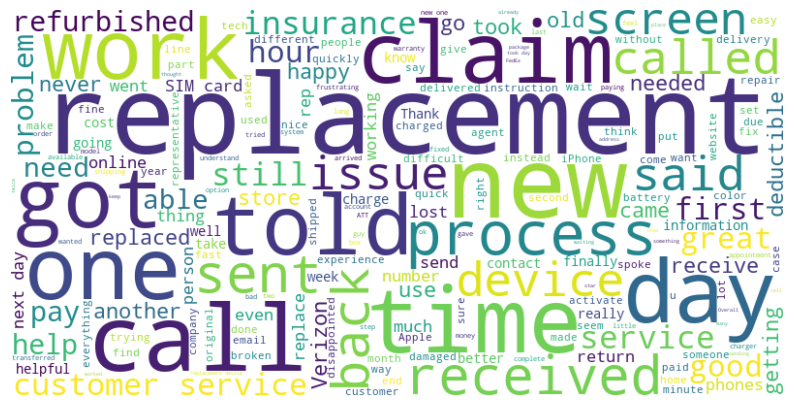

In [11]:
def display_wordcloud_from_column(df, rating):
    """
    Displays a word count cloud graph based on the specified column in a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        column_name (str): The name of the column containing the comments.
    """
    df = df.dropna()
    df["stars"] = df["stars"].str[6].astype(int)
    df = df[df["stars"] == rating]

    delete_punctiation(df)
    delete_stop_words(df)

    comment_text = ' '.join(df["comment_no_stopword"].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

    #print("Cloud of most used words in comments for "+ str(rating) +" ratings :")
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

display_wordcloud_from_column(df, 3)

In [16]:
def most_used_words(df, rating):
    """
    Counts the most frequently used words in a specified column of a DataFrame based on a given rating.

    Args:
        df (pandas.DataFrame): The DataFrame containing the text column.
        col (str): The name of the column to analyze.
        rating: The rating to filter the DataFrame by.

    Returns:
        pandas.DataFrame: A DataFrame containing the most frequently used words and their occurrence count.

    """
    df = df.dropna()
    df["stars"] = df["stars"].str[6].astype(int)
    df = df[df["stars"] == rating]

    delete_punctiation(df)
    delete_stop_words(df)

    l1 = ' '.join(df.loc[df.stars == rating, "comment_no_stopword"]).split()
    df_word_count = pd.DataFrame(pd.Series(l1).value_counts()).reset_index().head(15)
    df_word_count.columns = ['word','nb_occurence']
    return df_word_count

most_used_words(df, 5)

,word,nb_occurence
0,service,15692
1,easy,11771
2,replacement,10002
3,new,8629
4,claim,8015
5,fast,7215
6,day,6716
7,Thank,6686
8,process,6323
9,great,6152
